In [1]:
!pip install regressors

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from regressors import stats

In [3]:
df = pd.read_excel("fragile_state_index.xlsx", header=[0])
#pd.read_excel("/tmp/sample.xlsx", usecols = "B:F", skiprows=[0])

In [4]:
    dictionary = {"key1": "value1"}
print(dictionary["key1"])

value1


In [5]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.dtypes)

Country                              object
Year                                 object
Rank                                 object
Total                               float64
C1: Security Apparatus              float64
C2: Factionalized Elites            float64
C3: Group Grievance                 float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object


In [6]:
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Sudan,2006,1st,112.300000,9.8,9.1,9.7,7.50000,9.2,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,Congo Democratic Republic,2006,2nd,110.100000,9.8,9.6,9.1,8.10000,9.0,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,Cote d'Ivoire,2006,3rd,109.200000,9.8,9.8,9.8,9.00000,8.0,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,Iraq,2006,4th,109.000000,9.8,9.7,9.8,8.20000,8.7,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,Zimbabwe,2006,5th,108.900000,9.4,8.5,8.5,9.80000,9.2,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,Iceland,2020-01-01 00:00:00,174th,17.800000,1.0,1.8,0.7,2.80000,1.0,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
5292,Denmark,2020-01-01 00:00:00,175th,17.213587,1.6,1.4,4.0,1.30000,0.9,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
5293,Switzerland,2020-01-01 00:00:00,176th,17.094086,1.4,1.0,3.0,1.60000,1.5,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
5294,Norway,2020-01-01 00:00:00,177th,16.191210,1.8,1.1,3.6,1.69121,0.7,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [7]:
# Create dummy variables for the category_columns and merge on the numeric_columns to create an X dataset
# Define target data
# Create category_columns and numeric_columns variables
X = df.drop(['Country', 'Rank','Year','Total', 'C3: Group Grievance'], axis=1)
X 

,C1: Security Apparatus,C2: Factionalized Elites,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,9.8,9.1,7.50000,9.2,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,9.8,9.6,8.10000,9.0,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,9.8,9.8,9.00000,8.0,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,9.8,9.7,8.20000,8.7,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,9.4,8.5,9.80000,9.2,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5291,1.0,1.8,2.80000,1.0,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
5292,1.6,1.4,1.30000,0.9,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
5293,1.4,1.0,1.60000,1.5,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
5294,1.8,1.1,1.69121,0.7,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [8]:
# Fill in missing values in X with zeroes
X = X.fillna(0)
y = df['C3: Group Grievance']

In [9]:
pd.set_option('display.max_columns', 500)

In [10]:
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

C1: Security Apparatus              True
C2: Factionalized Elites            True
E1: Economy                         True
E2: Economic Inequality             True
E3: Human Flight and Brain Drain    True
P1: State Legitimacy                True
P2: Public Services                 True
P3: Human Rights                    True
S1: Demographic Pressures           True
S2: Refugees and IDPs               True
X1: External Intervention           True
Change from Previous Year           True
dtype: bool

In [11]:
X.dtypes

C1: Security Apparatus              float64
C2: Factionalized Elites            float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train.head()

,C1: Security Apparatus,C2: Factionalized Elites,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
1638,5.0,7.5,5.7,6.9,6.8,5.0,6.6,6.5,6.0,6.9,7.9,0.0
4963,8.2,7.9,6.4,6.5,6.6,8.0,8.3,8.2,9.0,8.7,7.9,-5.3
23,5.0,8.9,8.0,7.2,8.2,8.7,6.9,7.7,9.5,7.0,6.8,0.0
1667,6.5,7.8,5.1,8.4,5.2,7.1,6.7,6.1,5.9,2.2,4.4,0.0
3305,4.0,1.7,3.9,4.6,4.3,4.3,3.5,3.6,3.9,6.0,5.0,0.0


In [15]:
nn_model = tf.keras.models.Sequential()

In [16]:
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

In [17]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [18]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                312       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [19]:
nn_model.compile(loss="mean_squared_error", optimizer="adam")

In [20]:
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
125/125 [==============================] - 0s 673us/step - loss: 18.7345
Epoch 2/100
125/125 [==============================] - 0s 391us/step - loss: 2.0972
Epoch 3/100
125/125 [==============================] - 0s 645us/step - loss: 1.8881
Epoch 4/100
125/125 [==============================] - 0s 501us/step - loss: 1.8085
Epoch 5/100
125/125 [==============================] - 0s 462us/step - loss: 1.7194
Epoch 6/100
125/125 [==============================] - 0s 479us/step - loss: 1.6210
Epoch 7/100
125/125 [==============================] - 0s 415us/step - loss: 1.5305
Epoch 8/100
125/125 [==============================] - 0s 471us/step - loss: 1.4542
Epoch 9/100
125/125 [==============================] - 0s 458us/step - loss: 1.3806
Epoch 10/100
125/125 [==============================] - 0s 545us/step - loss: 1.3180
Epoch 11/100
125/125 [==============================] - 0s 488us/step - loss: 1.2423
Epoch 12/100
125/125 [==============================] - 0s 487us/step - l

In [21]:
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

In [22]:
r2_score(y_train, y_train_pred)

0.760254447127044

In [23]:
r2_score(y_test, y_test_pred)

0.7534609188169502

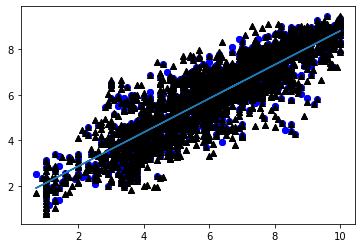

In [24]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [25]:
deep_model = tf.keras.models.Sequential()

In [26]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu', input_dim = len(X.columns)))

In [27]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu'))

In [28]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [29]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [30]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 939
Trainable params: 939
Non-trainable params: 0
_________________________________________________________________


In [31]:
deep_model.compile(loss="mean_squared_error", optimizer="adam")

In [32]:
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
125/125 [==============================] - 0s 566us/step - loss: 25.9768
Epoch 2/100
125/125 [==============================] - 0s 557us/step - loss: 1.8875
Epoch 3/100
125/125 [==============================] - 0s 518us/step - loss: 1.7710
Epoch 4/100
125/125 [==============================] - 0s 551us/step - loss: 1.6424
Epoch 5/100
125/125 [==============================] - 0s 551us/step - loss: 1.5074
Epoch 6/100
125/125 [==============================] - 0s 576us/step - loss: 1.3899
Epoch 7/100
125/125 [==============================] - 0s 532us/step - loss: 1.3004
Epoch 8/100
125/125 [==============================] - 0s 535us/step - loss: 1.2363
Epoch 9/100
125/125 [==============================] - 0s 527us/step - loss: 1.1903
Epoch 10/100
125/125 [==============================] - 0s 615us/step - loss: 1.1622
Epoch 11/100
125/125 [==============================] - 0s 560us/step - loss: 1.1443
Epoch 12/100
125/125 [==============================] - 0s 527us/step - l

In [33]:
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

In [34]:
r2_score(y_train, y_train_pred)

0.780810083563843

In [35]:
r2_score(y_test, y_test_pred)

0.7732313855535856

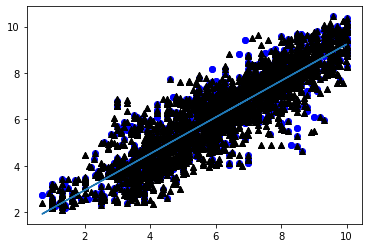

In [36]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [39]:
model.score(X_train_scaled, y_train)

0.7386670146291419

In [40]:
model.score(X_test_scaled, y_test)

0.7391860492462795

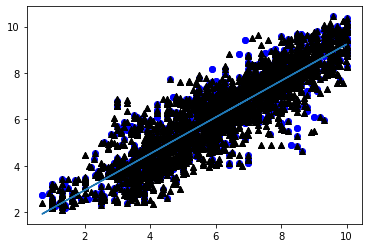

In [41]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [42]:
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [43]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_train, y_train))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_train, y_train, X.columns)

coef_pval:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.03370305e-02
 0.00000000e+00 6.97999162e-03 2.10276241e-13 0.00000000e+00
 1.02372713e-05 2.98560243e-05 0.00000000e+00 1.13516993e-05
 2.94085208e-05]

=========== SUMMARY ===========
Residuals:
    Min      1Q  Median      3Q     Max
-4.5866 -0.6197 -0.0632  0.6137  3.6674


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                        1.469091    0.068146  21.5579  0.000000
C1: Security Apparatus            0.307553    0.016268  18.9051  0.000000
C2: Factionalized Elites          0.408109    0.015754  25.9058  0.000000
E1: Economy                      -0.030322    0.015489  -1.9577  0.050337
E2: Economic Inequality           0.226415    0.015238  14.8582  0.000000
E3: Human Flight and Brain Drain -0.036879    0.013663  -2.6992  0.006980
P1: State Legitimacy             -0.143628    0.019495  -7.3675  0.000000
P2: Public Services              -0.197987    0.018799 -

In [44]:
ols = linear_model.LinearRegression()
ols.fit(X_test, y_test)

LinearRegression()

In [45]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_test, y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_test, y_test, X.columns)

coef_pval:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.05746005e-01
 3.29565264e-11 5.40611298e-01 7.79721565e-03 1.69417369e-08
 1.38508590e-03 5.43633325e-05 0.00000000e+00 1.73741445e-05
 1.13333920e-03]

=========== SUMMARY ===========
Residuals:
    Min     1Q  Median      3Q     Max
-4.4859 -0.651 -0.0145  0.6442  3.5377


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                        1.586176    0.117222  13.5314  0.000000
C1: Security Apparatus            0.338110    0.029499  11.4617  0.000000
C2: Factionalized Elites          0.359363    0.028045  12.8137  0.000000
E1: Economy                      -0.019205    0.028851  -0.6657  0.505746
E2: Economic Inequality           0.179353    0.026811   6.6895  0.000000
E3: Human Flight and Brain Drain  0.014991    0.024492   0.6120  0.540611
P1: State Legitimacy             -0.085811    0.032202  -2.6648  0.007797
P2: Public Services              -0.186519    0.032862  -5